In [1]:
import pandas as pd
import numpy as np

In [2]:
stock_prices = pd.read_csv(
    "data/base/stock_prices.csv",
    index_col="DATE",
    parse_dates=True
)

stock_prices.head()

,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEP,AES,...,WMB,WMT,WRB,WST,WY,XEL,XOM,XRAY,ZBRA,ZION
DATE,,,,,,,,,,,,,,,,,,,,,
1997-01-03,0.164833,6.379129,2.083333,4.795903,8.594171,9.768930,10.231798,6.968172,12.229783,8.163707,...,5.487269,7.277079,1.994665,4.725310,7.187573,7.310248,10.919062,6.595023,10.722222,16.518948
1997-01-10,0.138308,6.533964,1.986111,4.811225,8.594171,9.879935,10.202397,7.129118,12.416787,8.750049,...,6.024877,7.719337,1.911351,4.704122,7.568879,7.489522,11.707894,6.612471,11.222222,17.214685
1997-01-17,0.126941,6.859356,1.819444,4.587214,8.713536,9.491403,10.349407,6.803722,12.715980,9.065774,...,6.024877,7.518306,1.867243,4.749055,7.607005,7.569194,11.389590,6.786942,10.888889,18.009827
1997-01-24,0.127888,6.781585,1.805556,4.418452,8.594171,8.825340,9.849574,7.632001,12.566386,9.291288,...,5.913645,7.397693,1.754521,4.706463,7.244768,7.489522,11.098971,7.170780,11.444444,17.830912
1997-01-31,0.125994,6.781585,1.847222,4.648582,9.230777,8.769835,9.731964,7.484095,12.379379,10.712044,...,5.932188,7.638921,1.891748,4.727761,7.000435,7.350090,11.472631,6.943968,11.777778,18.367632


In [3]:
cum_rets = stock_prices.iloc[-1] / stock_prices.iloc[0] - 1
top_performers = cum_rets[cum_rets >= cum_rets.quantile(.9)]
top_performers

AAPL    1148.406570
ADBE     116.435652
AJG       69.125417
ANSS      98.116116
APH      141.802573
ATVI      97.762714
AZO      104.932912
BBY      100.227722
BIIB      73.128090
BRO       87.468463
CHD       70.650892
CPRT     331.159180
FDS      118.733849
FICO      80.257392
GILD     127.880100
INTU     113.205489
JBHT      68.007952
LOW       72.490422
LRCX      80.910567
MNST    4824.497158
NVR      504.580590
ODFL     472.568990
ORLY     239.622225
POOL     267.684785
QCOM      71.837942
RMD      138.543872
ROST      97.415715
STZ       78.261521
TJX       87.626022
TSCO     200.270132
TYL      197.330002
UNH       99.919116
WST       85.277941
dtype: float64

In [4]:
risk = stock_prices.pct_change().std()
low_risk = risk[risk < risk.quantile(.9)]
low_risk

AAPL    0.056561
ABT     0.032869
ACGL    0.036725
ADBE    0.054488
ADI     0.058692
          ...   
XEL     0.032773
XOM     0.033462
XRAY    0.037655
ZBRA    0.053629
ZION    0.062564
Length: 296, dtype: float64

In [5]:
high_return_low_risk_stocks = low_risk.index.intersection(top_performers.index)

In [6]:
stock_prices_pruned = stock_prices[high_return_low_risk_stocks]
stock_prices_pruned

,AAPL,ADBE,AJG,ANSS,APH,ATVI,AZO,BRO,CHD,CPRT,...,POOL,QCOM,RMD,ROST,STZ,TJX,TSCO,TYL,UNH,WST
DATE,,,,,,,,,,,,,,,,,,,,,
1997-01-03,0.164833,4.795903,3.295096,3.218750,0.620227,0.931931,24.000000,0.838717,1.343459,0.135417,...,1.370305,1.584202,1.140788,1.236591,3.273720,1.045291,1.095642,2.000000,4.719027,4.725310
1997-01-10,0.138308,4.811225,3.267866,2.031250,0.616762,1.023297,20.625000,0.823185,1.313604,0.136719,...,1.304266,1.767949,1.167318,1.248896,3.315691,1.062761,1.075721,2.000000,4.668284,4.704122
1997-01-17,0.126941,4.587214,3.295096,2.281250,0.623692,1.032433,21.500000,0.846483,1.328531,0.148438,...,1.337284,1.946731,1.180583,1.113547,3.189778,1.001616,1.075721,2.000000,4.389203,4.749055
1997-01-24,0.127888,4.418452,3.295096,2.312500,0.720710,1.055274,21.625000,0.830951,1.492731,0.148438,...,1.386813,2.219869,1.154053,1.095091,3.133817,0.960853,1.049160,2.250000,4.807827,4.706463
1997-01-31,0.125994,4.648582,3.281482,2.375000,0.713781,1.059842,21.625000,0.815419,1.522587,0.179688,...,1.419833,2.224834,1.160686,1.008960,3.147808,0.925912,1.075721,2.250000,4.947367,4.727761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-11,177.789993,508.450012,223.835388,301.209991,87.209999,91.209999,2483.830078,70.779999,95.716995,43.924999,...,375.000000,113.804169,179.000153,113.078156,267.679993,85.889999,221.437012,387.559998,508.010010,394.739990
2023-08-18,174.490005,508.130005,220.024506,292.589996,85.230003,90.470001,2458.389893,71.389999,93.089996,43.419998,...,349.489990,109.325874,165.669998,118.393501,257.070007,89.519997,218.252579,372.170013,498.440002,387.769989
2023-08-25,178.610001,525.059998,227.057709,304.890015,86.300003,91.660004,2453.399902,73.070000,93.300003,43.799999,...,353.980011,109.544334,160.979996,118.672729,259.489990,88.820000,213.539993,378.790009,489.119995,393.730011


In [8]:
stock_prices_pruned.to_csv("data/main/stock_prices_pruned.csv")

<Axes: xlabel='DATE'>

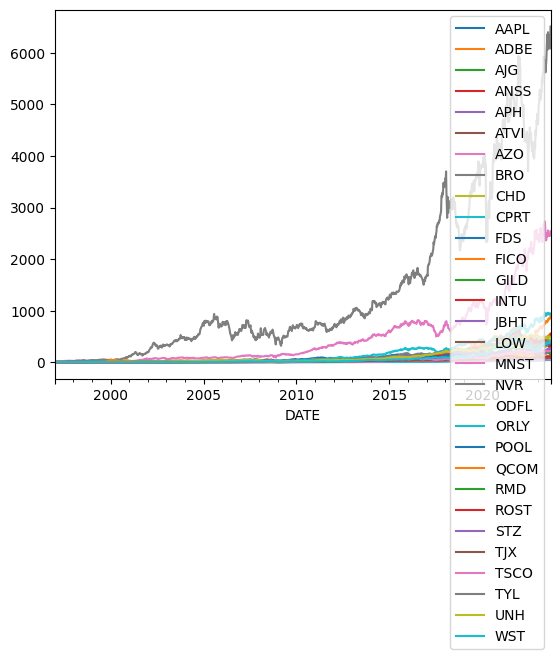

In [9]:
stock_prices_pruned.plot()